In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import emoji
import contractions
import re
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
#Here we read the data, drop columns we don't use, and drop reviews longer than 150 words.
dataset=pd.read_csv('stc_reviews.csv')
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c1165a53-de67-4e98-b5ce-a887bfa06c0a,Ataullah Ibrar hussain,https://play-lh.googleusercontent.com/a/AAcHTt...,Not good sarvice don't take stc sim i hate thi...,1,0,NaN,2023-05-25 16:10:14,Hi ✋\nWe are at your service around the clock ...,2023-05-26 06:21:48,NaN
1,6f47be56-a091-4c4e-a250-411d58999df6,Jasim Uddin,https://play-lh.googleusercontent.com/a/AAcHTt...,Jasim Uddin 90908090,1,0,4.36.0,2023-05-25 12:59:18,NaN,NaN,4.36.0
2,0c7fbe3a-cca8-493b-892e-a9252fe9dc04,md liton,https://play-lh.googleusercontent.com/a-/AD_cM...,best apps,5,0,4.35.0,2023-05-25 08:33:48,Hello ✋\nWe are pleased with your experience a...,2023-05-26 06:15:45,4.35.0
3,bfb20d33-a112-4b6e-818c-0986a815c750,ak moose (AK45CC),https://play-lh.googleusercontent.com/a-/AD_cM...,I overpaid my bill. When trying to refund open...,1,0,4.37.0,2023-05-25 08:18:13,Hi ✋\nWe are at your service around the clock ...,2023-05-26 06:21:08,4.37.0
4,a2b24738-dc21-4023-aa9b-90acc3b6987c,Qamar Abajober,https://play-lh.googleusercontent.com/a/AAcHTt...,Good,3,0,4.36.0,2023-05-24 22:17:37,Hello ✋\nWe are pleased with your experience a...,2023-05-26 06:15:28,4.36.0
...,...,...,...,...,...,...,...,...,...,...,...
20112,4caf247b-73b7-4143-b298-dc94e4ec0058,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"ممتاز , اخيرا",5,0,NaN,2012-10-22 05:12:56,NaN,NaN,NaN
20113,fe3f5759-d94a-4da5-b1ea-44f1a00a102f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Well done app,5,1,NaN,2012-10-22 05:00:17,NaN,NaN,NaN
20114,9de79c7c-d9e9-43e0-a860-5b57e6e317ab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,تطبيق رائع,5,1,NaN,2012-10-22 03:30:11,NaN,NaN,NaN
20115,d90eb04e-ade5-45fd-9786-05c406d0ea9c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Nice graphics, good functions.",5,1,1.0,2012-10-22 01:47:04,NaN,NaN,1.0


In [40]:
data_in = dataset.copy()
data_in = data_in.drop_duplicates(subset="content")  # Drop dupes in Reviews
data_in.drop(["reviewId", "userName",
             "userImage","score","thumbsUpCount","reviewCreatedVersion","replyContent","repliedAt"], axis=1, inplace=True)
data_in["Length"] = data_in["content"].str.split(" ").str.len()
data_in = data_in[data_in.Length < 150]
data_in.drop(["Length"], axis=1, inplace=True)
data = data_in
data

,content,at,appVersion
0,Not good sarvice don't take stc sim i hate thi...,2023-05-25 16:10:14,NaN
1,Jasim Uddin 90908090,2023-05-25 12:59:18,4.36.0
2,best apps,2023-05-25 08:33:48,4.35.0
3,I overpaid my bill. When trying to refund open...,2023-05-25 08:18:13,4.37.0
4,Good,2023-05-24 22:17:37,4.36.0
...,...,...,...
20110,Great job!,2012-10-22 05:51:55,1.0
20111,Well done.,2012-10-22 05:49:37,1.0
20112,"ممتاز , اخيرا",2012-10-22 05:12:56,NaN
20113,Well done app,2012-10-22 05:00:17,NaN


In [33]:
def clean_text(text):
    text = emoji.demojize(text)  # fix emojis
    text = contractions.fix(text)  # fix contractions
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # remove strange fonts
    text = re.sub(r"\d+", "number", text)  # replace numbers with "number"
    text = re.sub(r'[^\w\s]', '', text)  # remove non-alphanumeric chars
    text = text.replace('_', ' ')  # replace underscores with space
    text = text.strip()  # strip extra spaces
    return text


In [46]:
data["content"] = data["content"].apply(clean_text)
data

,content,at,appVersion
0,Not good sarvice do not take stc sim i hate th...,2023-05-25 16:10:14,NaN
1,Jasim Uddin number,2023-05-25 12:59:18,4.36.0
2,best apps,2023-05-25 08:33:48,4.35.0
3,I overpaid my bill When trying to refund opene...,2023-05-25 08:18:13,4.37.0
4,Good,2023-05-24 22:17:37,4.36.0
...,...,...,...
20110,Great job,2012-10-22 05:51:55,1.0
20111,Well done,2012-10-22 05:49:37,1.0
20112,,2012-10-22 05:12:56,NaN
20113,Well done app,2012-10-22 05:00:17,NaN


In [45]:
#Checking for null values
data.isnull().sum()

content          0
at               0
appVersion    2001
dtype: int64

In [47]:
!pip install textstat
!pip install nltk


  Using cached textstat-0.7.3-py3-none-any.whl (105 kB)
  Using cached pyphen-0.14.0-py3-none-any.whl (2.0 MB)


In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from textstat import flesch_reading_ease

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [49]:
sid = SentimentIntensityAnalyzer()
words = set(nltk.corpus.words.words())


In [50]:
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []


    


In [52]:
for index, row in data.iterrows():
    contents = row['content']
    
    sentiment_scores = sid.polarity_scores(contents)
    
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    neutral_score = sentiment_scores['neu']
    compound_score = sentiment_scores['compound']
    
    positive_scores.append(positive_score * 100)
    negative_scores.append(negative_score * 100)
    neutral_scores.append(neutral_score * 100)
    compound_scores.append(compound_score * 100)

In [53]:
data['POSITIVE SCORE'] = positive_scores
data['NEGATIVE SCORE'] = negative_scores
data['NEUTRAL SCORE'] = neutral_scores
data['COMPOUND SCORE'] = compound_scores


data

,content,at,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE
0,Not good sarvice do not take stc sim i hate th...,2023-05-25 16:10:14,NaN,5.3,33.5,61.2,-78.49
1,Jasim Uddin number,2023-05-25 12:59:18,4.36.0,39.4,0.0,60.6,7.72
2,best apps,2023-05-25 08:33:48,4.35.0,80.8,0.0,19.2,63.69
3,I overpaid my bill When trying to refund opene...,2023-05-25 08:18:13,4.37.0,4.6,4.0,91.3,-15.31
4,Good,2023-05-24 22:17:37,4.36.0,100.0,0.0,0.0,44.04
...,...,...,...,...,...,...,...
20110,Great job,2012-10-22 05:51:55,1.0,80.4,0.0,19.6,62.49
20111,Well done,2012-10-22 05:49:37,1.0,67.7,0.0,32.3,27.32
20112,,2012-10-22 05:12:56,NaN,0.0,0.0,0.0,0.00
20113,Well done app,2012-10-22 05:00:17,NaN,51.2,0.0,48.8,27.32


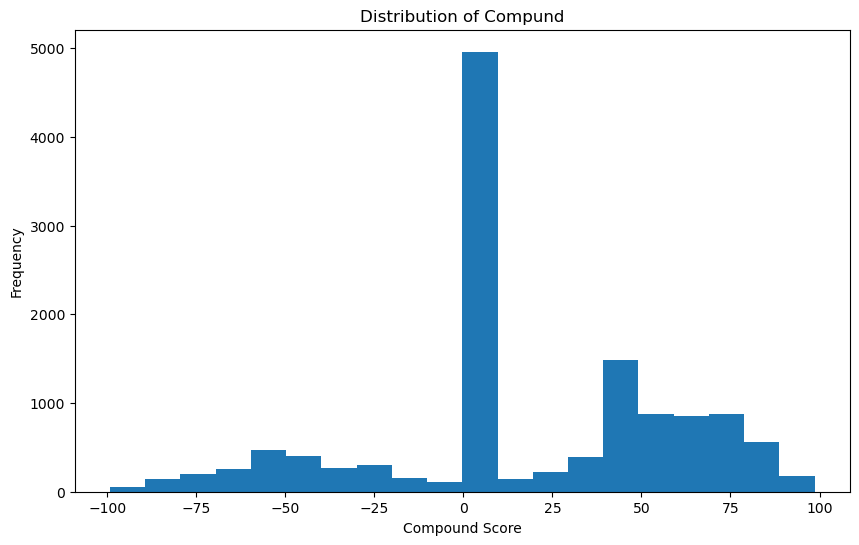

In [55]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(data['COMPOUND SCORE'], bins=20)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compund')
plt.show()

In [58]:
positive_threshold = 0.2
negative_threshold = -0.2

data['Sentiment']= ''

for index, row in data.iterrows():
    compound_score = row['COMPOUND SCORE']
    
    if compound_score > positive_threshold:
        data.at[index, 'Sentiment'] = 'Positive'
    elif compound_score < negative_threshold:
            data.at[index, 'Sentiment'] = 'Negative'
    else:
                data.at[index, 'Sentiment'] = 'Neutral'

In [60]:
data.head(100)

,content,at,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE,Sentiment
0,Not good sarvice do not take stc sim i hate th...,2023-05-25 16:10:14,NaN,5.3,33.5,61.2,-78.49,Negative
1,Jasim Uddin number,2023-05-25 12:59:18,4.36.0,39.4,0.0,60.6,7.72,Positive
2,best apps,2023-05-25 08:33:48,4.35.0,80.8,0.0,19.2,63.69,Positive
3,I overpaid my bill When trying to refund opene...,2023-05-25 08:18:13,4.37.0,4.6,4.0,91.3,-15.31,Negative
4,Good,2023-05-24 22:17:37,4.36.0,100.0,0.0,0.0,44.04,Positive
...,...,...,...,...,...,...,...,...
107,Do Not like it,2023-05-14 14:14:30,NaN,0.0,41.3,58.7,-27.55,Negative
108,is ok,2023-05-14 13:01:24,4.36.0,68.8,0.0,31.2,29.60,Positive
109,very nice,2023-05-14 12:46:37,4.36.0,75.6,0.0,24.4,47.54,Positive
110,Great app,2023-05-14 12:38:58,4.35.0,80.4,0.0,19.6,62.49,Positive


In [61]:
data['Sentiment'].value_counts()

Positive    5888
Neutral     4657
Negative    2353
Name: Sentiment, dtype: int64

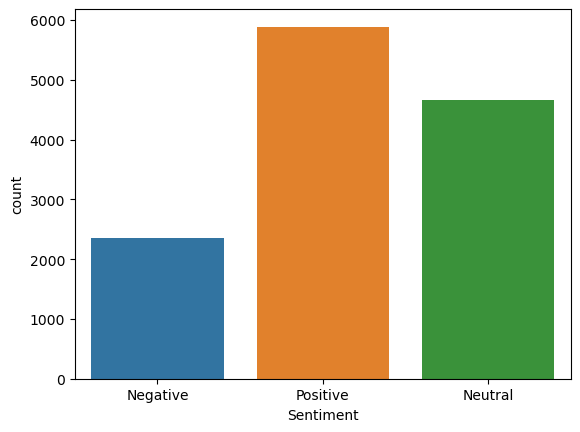

In [63]:
import seaborn as sns

sns.countplot(data=data,x='Sentiment')
plt.show()

In [64]:
data.to_csv('SentimentSTC.csv', index=False)